## 1- Dowload the data 

#### import the important packages

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import sklearn.model_selection as skl

In [6]:
import seaborn as sns

#### create a dataframe 

In [7]:
housing= pd.read_csv("/Users/AA/Desktop/housing.csv")

## 2- Take a quick look at the data structure 

#### Look at the top rows of the dataset to have a better understanding 
- Each row represents one district
- There are 10 columns/attributes
- The top 5 rows of ocean_proximity are repetitive which probably means that it is a categorical attribute and we can use the value_counts() attribute to understand it more.

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Use the info function to have a description of the total number of rows, the presence of null values and the type of each column
- We can see that there are 20,640 rows in the data set
- The number total_bedrooms has 20,433 values (207 missing)
- All attributes are numerical except for the ocean_proximity which is an object
     - This means that it can hold any type kind of python object, but since the data was loaded from a csv, you know that it must be a text attribute. 

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Use the value_counts() to have a better grasp of the categorical column
- We can see that there are 5 different categories, ISLAND accounts for 0.024% of the total values 


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Use the describe function to have a summary of each numerical column
- Note that the null values are ignored
- 25th precentile represents the value under which 25% of numbers fall below (ex: 25% of housing_median age fall below 18.0)
- To have a better feel of the numerical value, you can plot histograms of all the numerical values in the dataset

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Use the .hist function to have a summary of each numerical column
- If you call hist on the entire dataset, histograms will be plotted for all the numerical variables in the dataset
- The alternative is to plot each graph alone 
- You'll need to change the figsize argument to have a better view of the graphs 
- You can change the bin sizes to have a better feel of the distributions 

#### Interpretation of the graphs
- You can feel that the median income is too small (the measures are in 10,000)
- housing_median_age and median_house_value were capped (they have a limit)
- The attributes have very different scales
- Many histograms are tail heavy, they extend much farther to the right of the median than to the left (we may have to transform these attributes for them to have bell shaped distributions)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

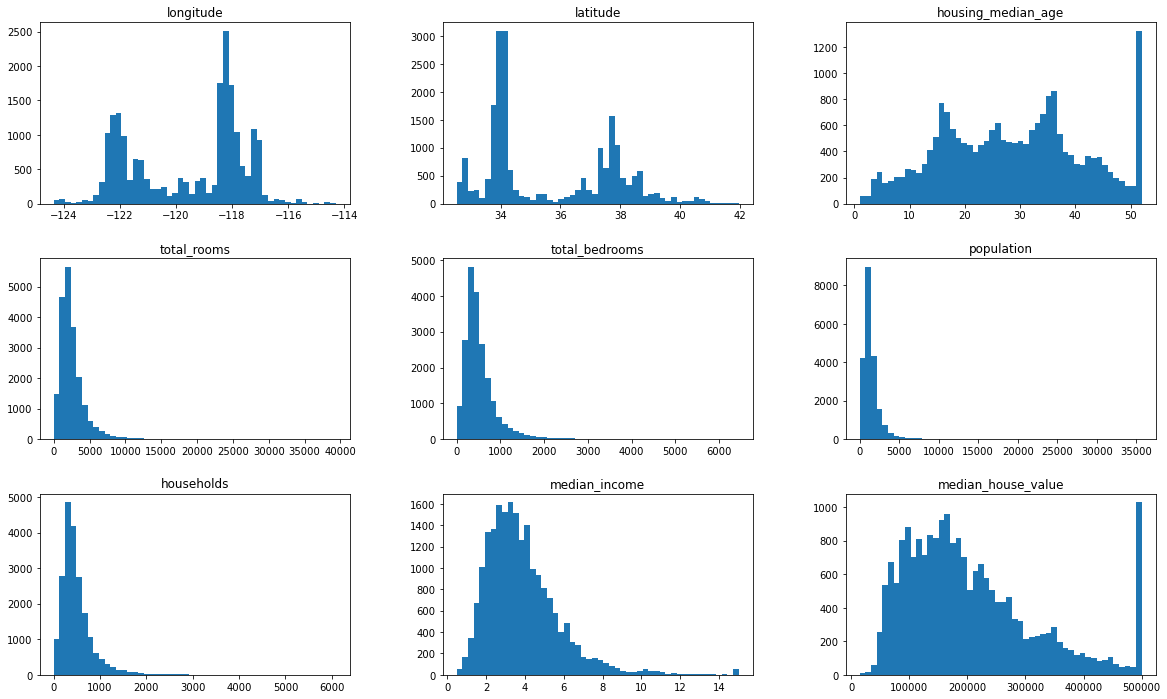

In [12]:
housing.hist(bins=50 ,figsize= (20,12), grid=False)

## 3- Create a test set

#### Split the dataset 
- It is important to split the dataset from the start so that the model creator doesn't make assumptions of the model (data snooping bias)
- You would want to use a random seed in order to split the data the same way everytime you run the model
- Dependently on the data, you may need to use stratify split which will divide the dataset based on a percentage criteria (for ex: the data set picked for the study 50% male and 50% female, thus it might be important to split the dataset randomly in the same way)
- In our example, median income is very important to predict housing prices 
    - On that note, you might want to use stratify sampling based on the income levels as opposed to randomly 
        - Since median_income is a continuous variable, you need to divide the values in categories
        - It is important to have sufficient number of instances in each stratum or else the estimate of the stratum's importance may be biased
            - This mean that you shouldn't have many stratum and each stratum should be large enough 
        - Since most of the values are ranged between 1.5 and 6, we will create the following split
- When splitting is done, you can compare the distribution of the values between the training, testing and orginal dataset
- Finally, you should remove the income_cat column from the test and train dataset

the pd.cut() function will split the dataset between 5 bins, from 0 to 1.5; 1.5 to 3; ...

In [13]:
housing["income_cat"]= pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels= [1, 2, 3, 4, 5])

<AxesSubplot:>

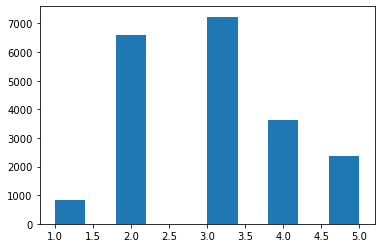

In [14]:
housing["income_cat"].hist(grid=False)

Stratifying sampling

In [15]:
split = skl.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [16]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
train_set_dist= strat_test_set["income_cat"].value_counts()/len(strat_test_set)
test_set_dist=strat_train_set["income_cat"].value_counts()/len(strat_train_set)
orig_set_dist= housing["income_cat"].value_counts()/len(housing)
comparison_df= pd.DataFrame(zip(train_set_dist,test_set_dist,orig_set_dist), columns=["training","testing","orginal"])

In [18]:
comparison_df

,training,testing,orginal
0,0.350533,0.350594,0.350581
1,0.318798,0.318859,0.318847
2,0.176357,0.176296,0.176308
3,0.114583,0.114402,0.114438
4,0.039729,0.039850,0.039826


In [19]:
for i in (strat_test_set, strat_train_set):
    i.drop("income_cat", axis=1, inplace=True)

In [20]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


## 4- Discover and visualize data to gain insights
- If the data set is quite large you may want to sample an exploration set, to make manipulations easy and fast (this dataset is considered to be small)
- You can use the .copy function to create a copy of the dataset, to leave the original one intact

In [21]:
housing= strat_train_set.copy()

#### visualizing geographical data
- Using the parameter alpha (between 0 and 1) can make the values more transparent and thus help us understand the density better

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

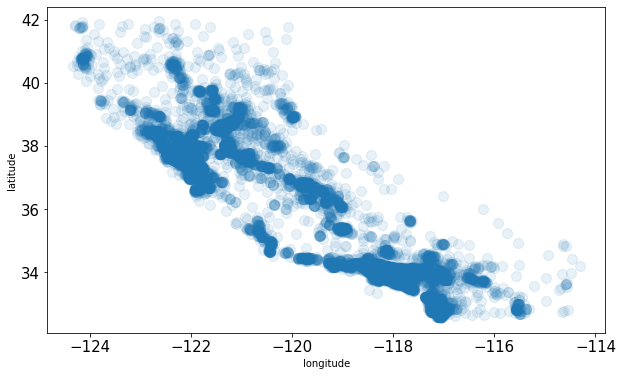

In [22]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10,6), s=100)


#### visualizing housing prices
- The radius of each circle represents district's population (parameter s) 
- The color represents the price (parameter c)
- We will use a predefined color map called jet (option cmap) -> colors range from blue to red
- This graph shows us that the houses that are near the cost are prices higher and have more population

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

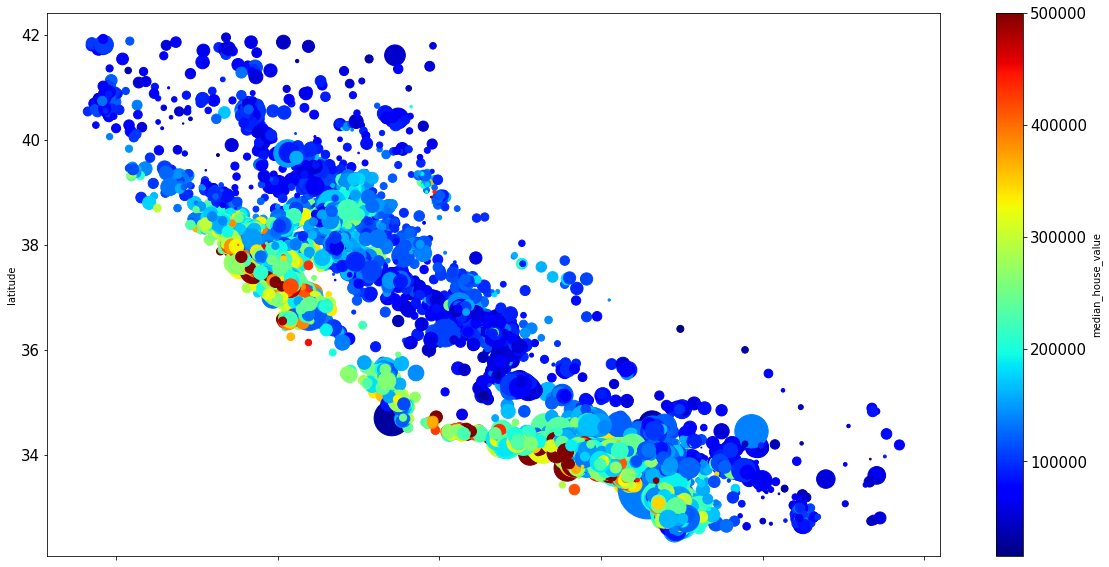

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"]/10, 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar= True, figsize=(20,10))

#### looking for correlations
- Since the dataset is not too large, you can compute the standard correlation coefficient (also called Pearson's r) between every pair of attribute using the corr() method
    - Close to -1/1 -> highly linearly correlated 
    - Close to 0 -> not linearly correlated 
- Note that the standard correlation coefficient only measured linear correlation and may miss out on non linear relationships (for example, when x close to 0, y goes up)
    - In this example, note how all the plots of the bottom row have a correlation coefficient equal to 0, despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships
- You can also use a heatmap to visualize the correlations faster

Correlation using table 

In [263]:
corr_matrix= housing.corr()

In [264]:
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Correlation using heatmap

<AxesSubplot:>

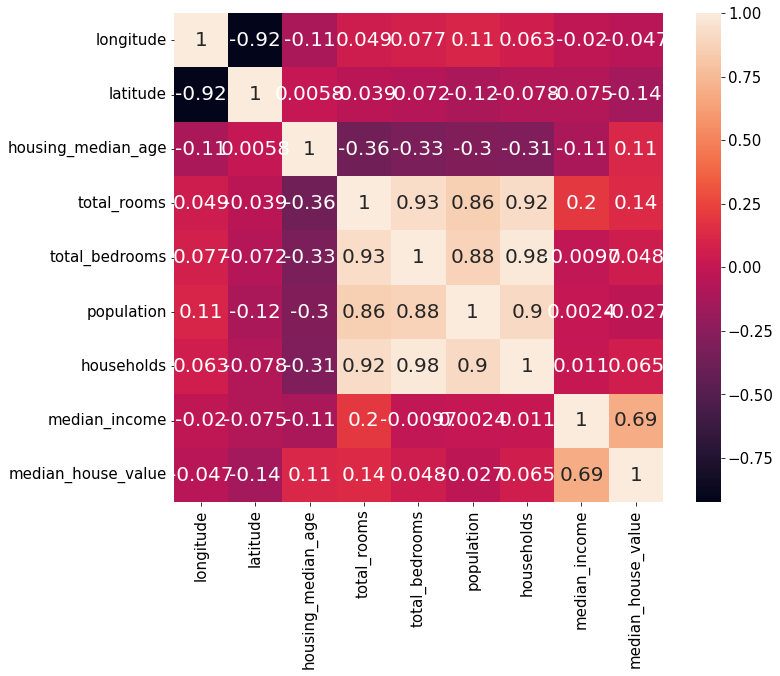

In [265]:
corrmat = housing.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True, annot= True)

- Correlation using pandas scatter matrix function
- Note that there are 11 attributes, 11^2= 121 scatter plots 
- A good idea would be to plot only the ones that may be of interest 
- Note that since the main diagonal would be filled with straight lines, pandas automatically replaces it with a histogram of each attribute

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

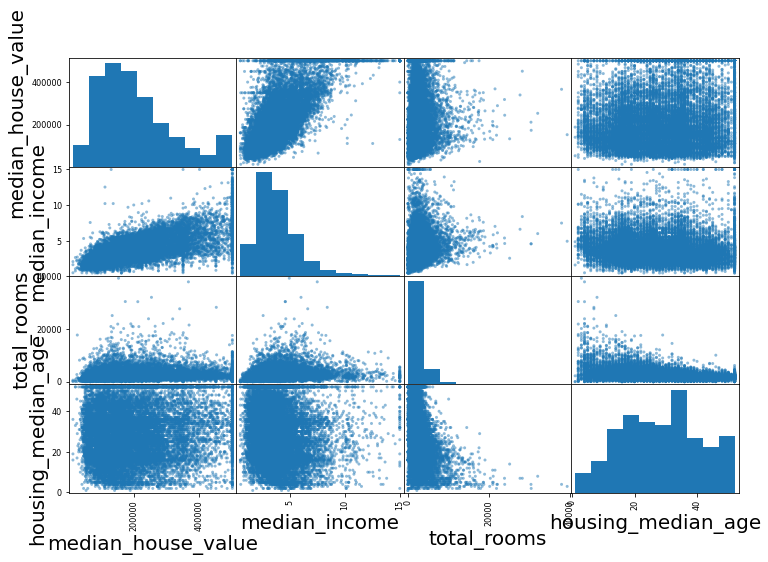

In [266]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

#### zooming in on correlated attributes
- since median_income and median_house_value are very correlated, it would be interesting to zoom in on the graph representing their correlation 
- Interpretation of scatter plot
    - Correlation is very strong: you can clearly see the upward trend, and the points are not too dispersed
- You can clearly see price caps (500k, 350k, maybe 280k ...)
    - You may want to remove the representing district to prevent the algorithm to reproduce these data quirks


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

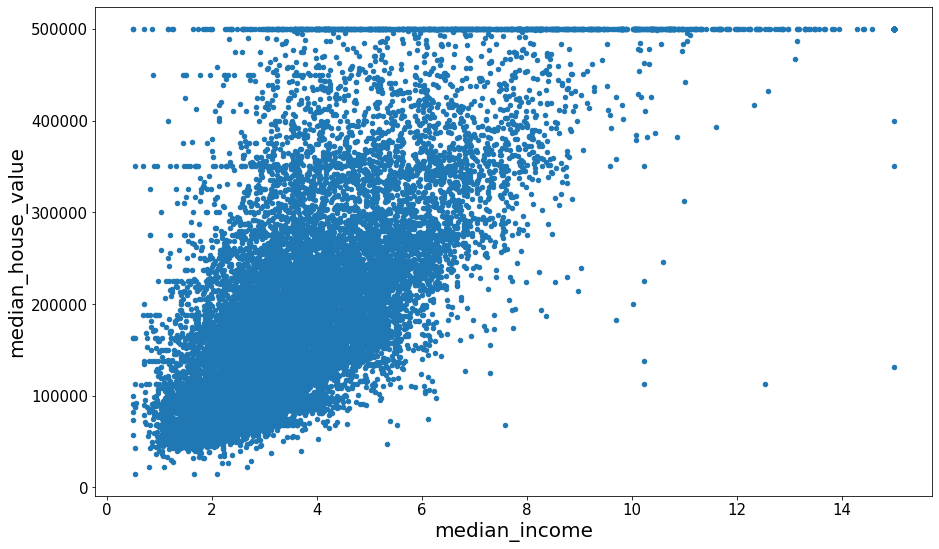

In [267]:
#Use this to increase the font size of the axis labels
plt.rcParams.update({'font.size':20})
housing.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(15,9))

## 5- Experimenting with attributes combinations
- Some attributes may provide more value if they are calculated along with other attributes: try out various attribute combinations
- In our example:
    - The total number of rooms in a district is not very useful if you don't know how many households there are (what you really want is the number of rooms per household)
    - The total number of bedrooms by it self is not very useful, you totaly want to compare it to the total number of rooms
- The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. 
- The number of rooms per household is also more informative than the total number of rooms in a district

In [268]:
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]= housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]

In [269]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,5.505618,0.193878,3.808989


In [270]:
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

## 6- Prepare the data for machine learning algorithms
- Revert back to a clean training set (by copying strat_train_set once again)
    - Note that by using drop, you are creating a copy of the data set and not affecting the original one
- Seperate the attribute you're trying to predict (label) from the rest of the attributes


In [271]:
housing= strat_train_set.drop("median_house_value", axis=1)

In [392]:
housing_labels= strat_train_set["median_house_value"].copy()

In [393]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


## 7- Data cleaning
- Most machine learning algorithms can't work with missing values
- We noticed earlier that total_bedrooms_attribute has some missing values, let's fix that
    - We can remove the entire attribute -> housing.drop("total_bedrooms", axis=1)
    - Remove all the corresponing rows (disctrict) -> housing.dropna(subset=["total_bedrooms"])
    - Replace the missing values with some other values (mean, median zero ...) -> housing["total_bedrooms"].fillna(median, inplace= True)
        - If you chose this option you should compute the median value of the training set and replace the missing values of the training set 
        - Don't forget to save the median value you calculated. You will need it later on with the testing set
        
        - Scikit-Learn provides a useful class to take care of missing values: SimpleImputer
            - import
            - Create a simple imputer instance specifying that you want to replace each attribute's missing value with the median of the attribute
            - Remove the categorical values from the dataset 
            - Fit the imputer instance to the training data using the fit() method
            - Since we cannot make sure that later on, the other attributes won't have missing values, we should apply the imputer to all the numerical attributes 
            - Replace the missing values with the learned medians
            - Transform the numpy array back into a dataframe
        
    
   

In [273]:
from sklearn.impute import SimpleImputer 

In [274]:
imputer= SimpleImputer(strategy="median")

In [275]:
housing_num= housing.drop("ocean_proximity", axis=1)

In [276]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [277]:
X= imputer.transform(housing_num)

In [278]:
housing_tr= pd.DataFrame(X, columns= housing_num.columns, index= housing_num.index)

## 8- Handling text and categorical attributes
- We should transform the categorical attributes into numerical attributes
- One way would be to use the OrdinalEncoder class. 
    - However, this class assumes that the categorical variables are ordinal 
- For our case, we should use one hot encoding by using the OneHotEncoder class 
    - For every attribute, create a column and replace one with the value of this specific attribute and 0 for the others 
    - Note that if we have many attributes, we may want to try and replace the categorical variable with a numerical one (in our example we can change it to distance from the ocean)
    - Notice that the output of the OneHotEncoder class is a SciPy sparce matrix instead of a NumPy array 
        - This is very useful when you have categorical attributes with thousands of categories as it saves up memory by only storing the values of one and disregarding the positions of the zeroes
        - if you want to convert it to a NumPy array, you just need to call the function .toarray()

In [279]:
housing_cat= housing[["ocean_proximity"]]

In [280]:
from sklearn.preprocessing import OneHotEncoder

In [288]:
cat_encoder= OneHotEncoder()

In [289]:
housing_cat_1hot= cat_encoder.fit_transform(X=housing_cat, y=None)

In [290]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [357]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## 9- Custom tranfomers
- Sklearn provides many useful transformers
    - Transformers such as custom cleanup operations and combining specific attributes have to be created by the user
- You'll want your transformers to work seamlessly with Sklearn functionalities (such as piplines)
- When you create a class you'll need to implement three methods: fit(), transform(), and fit_transform()
    - If you add TransfomerMixin as a base class, you can get the fit_transformer() for free
    - If you add BaseEstimator as a base class (and avoid *args and *kargs in your constructor), you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning
    
- Here is a small transfomer that adds combined attributes we implemented above


In [396]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## 10- Feature scaling
- With few exceptions, machine learning algorithms don't perform well when the scale is different 
- You can use:
    - min-max scaling 
    - standardization (much less affected by outliers)

- As with all the transformations, it is important to fir the scalars to the training set only 

In [403]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)
 

In [370]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [373]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [375]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [377]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
68628.19819848922


68628.19819848922

In [378]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



0.0

In [397]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [398]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [399]:
display_scores(tree_rmse_scores)

Scores: [68313.32657197 66194.3025265  71438.72981729 70443.76778956
 70538.94871409 74498.84068331 71110.63742658 70422.48610641
 77376.38432313 69254.7177281 ]
Mean: 70959.21416869338
Standard deviation: 2954.7028648844175


In [400]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347
